In [23]:
# Load data
import pickle
import numpy as np

num_leapfrog_steps = 1000
file = '/BNNN-NS-' + str(num_leapfrog_steps) + '.pkl'

file = '/2ndSimple_mdp1000' + '.pkl'
file = '/2ndAverage_mdp1000' + '.pkl'
file = '/3rd_mdp1000' + '.pkl'
file = '/weno_mdp1000' + '.pkl'
file = '/2ndSimple_dp_top301000' + '.pkl'
file = '/2ndAverage_mdp_top301000' + '.pkl'
file = '/3rd_dp_top301000' + '.pkl'
file = '/weno_mdp_top301000' + '.pkl'
file = '/2ndSimple_dp_likeli10_1.25' + '.pkl'

scheme = '2ndSimple'

shift = 1123

#with open('../../Results/A vs N - 1000+/' + file, 'rb') as f:
with open('Schemes/' + file, 'rb') as f:
    samples = pickle.load(f)
    momentum_norm_total = pickle.load(f)
    alphas = pickle.load(f)
    proposed_H_store = pickle.load(f)
    current_H = pickle.load(f)
    grad_list_total = pickle.load(f)
    negative_log_posterior_list_total = pickle.load(f)
    acceptance_list = pickle.load(f)
    MAP_weights = pickle.load(f)
    MAP_biases = pickle.load(f)
    momentum_keep = pickle.load(f)
    potential_keep = pickle.load(f)
    loss_all_data = pickle.load(f)
    loss_all_pde = pickle.load(f)

num_samples = len(acceptance_list)
print('Number of samples:', num_samples)
# Print number of accepted samples
accepted_samples = np.sum(acceptance_list)
print('Number of accepted samples:', accepted_samples)

import numpy as np
import matplotlib.pyplot as plt
input_dim = 2

Number of samples: 1
Number of accepted samples: 0


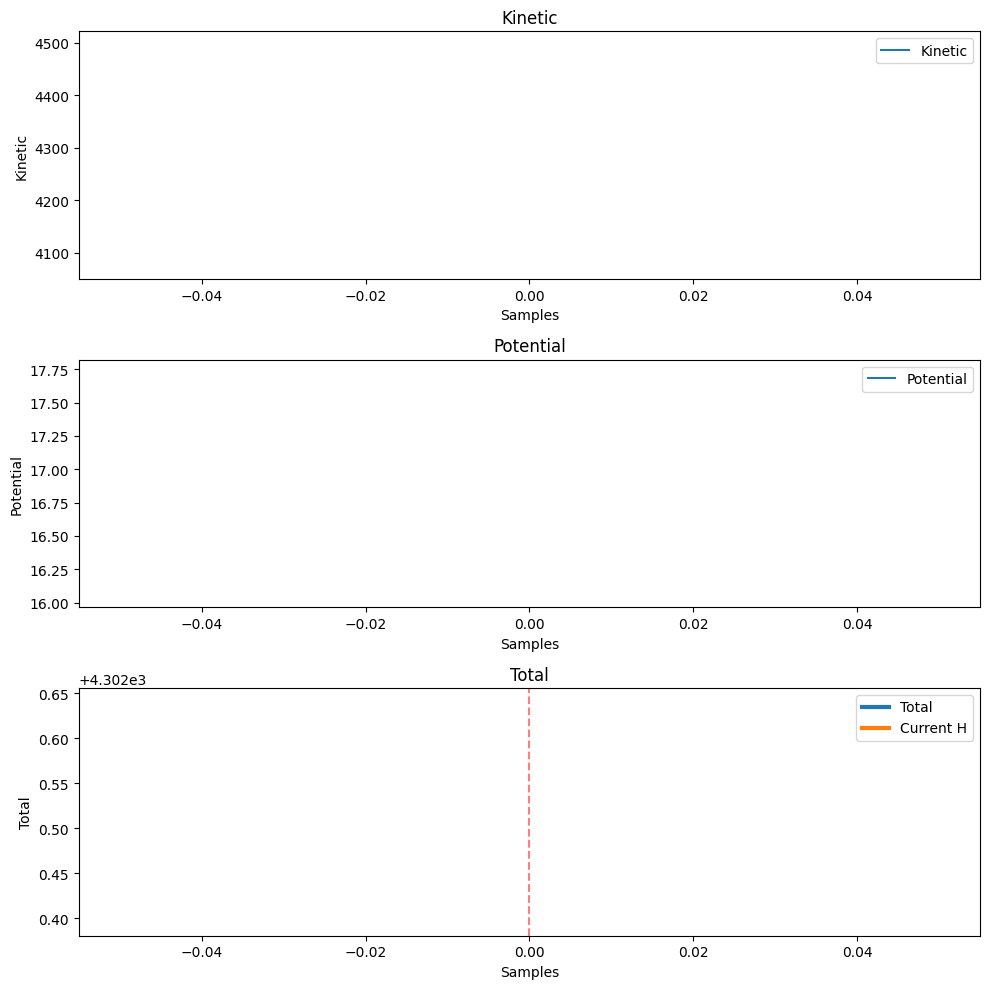

In [24]:
# plot momentum_keep and potential_keep in subplots and another subplot for summation of the two
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(momentum_keep, label='Kinetic')
plt.xlabel('Samples')
plt.ylabel('Kinetic')
plt.title('Kinetic')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(potential_keep, label='Potential')
plt.xlabel('Samples')
plt.ylabel('Potential')
plt.title('Potential')
plt.legend()

plt.subplot(3, 1, 3)
for i in range(num_samples):
    if acceptance_list[i] == 1:
        plt.axvline(x=i, color='g', linestyle='--', linewidth=6, alpha=0.5)
    else:
        plt.axvline(x=i, color='r', linestyle='--', alpha=0.5)
plt.plot(np.add(momentum_keep, potential_keep), label='Total', linewidth=3)
plt.plot(current_H, label='Current H', linewidth=3)
plt.xlabel('Samples')
plt.ylabel('Total')
plt.title('Total')
#plt.xlim(0, 45)
plt.legend()

plt.tight_layout()
plt.savefig('BPINN_leapfrog_' + str(num_leapfrog_steps) +'_energies.png')
plt.show()

N:  5000
T:  200
25
(200, 200)
(40000, 1)
(40000, 1)
(40000, 1)
(40000, 1)
(40000, 1)
(40000, 1)
(200, 3)
x min:  1.0
x max:  6.303030303030303
y min:  -2.0
y max:  2.0
(200, 3)
(200, 3)


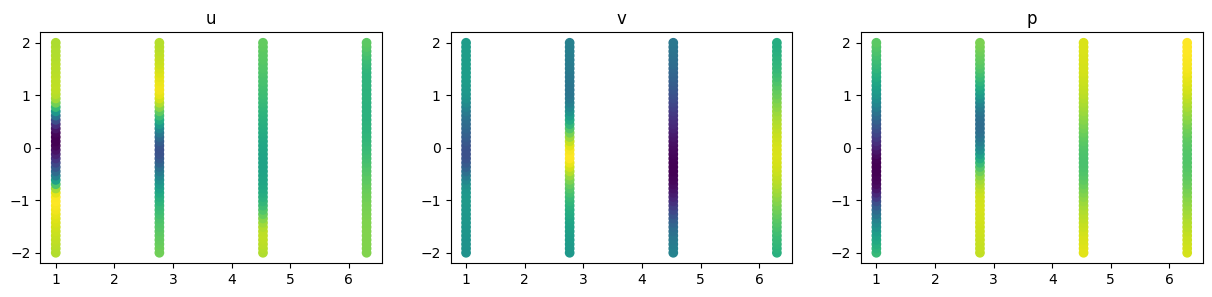

In [25]:
import numpy as np
import scipy.io
# Load Data
data = scipy.io.loadmat('cylinder_nektar_wake.mat')
        
nu = 1/100
U_star = data['U_star'] # N x 2 x T
P_star = data['p_star'] # N x T
t_star = data['t'] # T x 1
X_star = data['X_star'] # N x 2

N = X_star.shape[0]
T = t_star.shape[0]
print("N: ", N)
print("T: ", T)

# Rearrange Data 
XX = np.tile(X_star[:,0:1], (1,T)) # N x T
YY = np.tile(X_star[:,1:2], (1,T)) # N x T
TT = np.tile(t_star, (1,N)).T # N x T

UU = U_star[:,0,:] # N x T
VV = U_star[:,1,:] # N x T
PP = P_star # N x T

# Take every step-th of XX, YY, TT, UU, VV, PP
increment_step = 25
XX = XX[::increment_step,:]
YY = YY[::increment_step,:]
TT = TT[::increment_step,:]
UU = UU[::increment_step,:]
VV = VV[::increment_step,:]
PP = PP[::increment_step,:]

print(increment_step)
print(XX.shape)

x = XX.flatten()[:,None] # NT x 1
y = YY.flatten()[:,None] # NT x 1
t = TT.flatten()[:,None] # NT x 1

u = UU.flatten()[:,None] # NT x 1
v = VV.flatten()[:,None] # NT x 1
p = PP.flatten()[:,None] # NT x 1

# Print the shape of the data
print(x.shape)
print(y.shape)
print(t.shape)
print(u.shape)
print(v.shape)
print(p.shape)

# u0, v0, p0 are the initial conditions
u0 = UU[:,0:1]
v0 = VV[:,0:1]
p0 = PP[:,0:1]

initial_data = np.concatenate([u0, v0, p0], 1)
print(initial_data.shape)

# Print min and max of x and y
print("x min: ", np.min(x))
print("x max: ", np.max(x))
print("y min: ", np.min(y))
print("y max: ", np.max(y))

# Create training data for selected timestep only
timestep = 11
X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1], TT[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
Y_tf = np.concatenate([UU[:,timestep:timestep+1], VV[:,timestep:timestep+1], PP[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
#X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
print(X_tf.shape)
print(Y_tf.shape)

# Plot scatter of training date for u, v and p for selected timestep, in 3 subplots
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
axs[0].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,0])
axs[0].set_title('u')
axs[1].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,1])
axs[1].set_title('v')
axs[2].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,2])
axs[2].set_title('p')
plt.show()

In [26]:
'''import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network architecture
class BayesianNeuralNetwork:
    def __init__(self, input_dim, hidden1, hidden2, output_dim, dropout_rate=0., prior_std=1.0):
        # Initialize weights and biases as TensorFlow variables
        initializer = tf.initializers.GlorotUniform()
        #initializer = tf.keras.initializers.HeNormal()

        # Define trainable parameters (weights and biases)
        self.weights = [
            tf.Variable(initializer([input_dim, hidden1]), dtype=tf.float32),
            tf.Variable(initializer([hidden1, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, output_dim]), dtype=tf.float32)
        ]
        
        self.biases = [
            tf.Variable(tf.zeros([hidden1]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([output_dim]), dtype=tf.float32)
        ]

        # Prior parameters (assuming Gaussian priors)
        self.prior_std = prior_std
        self.prior_vars = [
            tf.constant(self.prior_std**2, dtype=tf.float32) for _ in self.weights + self.biases]
        
        self.dropout_rate = dropout_rate

    def forward(self, X, training=True):
        # Layer 1 with tanh activation
        hidden1 = tf.matmul(X, self.weights[0]) + self.biases[0]
        hidden1_activation = tf.nn.tanh(hidden1)
        if training:
            hidden1_activation = tf.nn.dropout(hidden1_activation, rate=self.dropout_rate)
        
        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden1_activation, self.weights[1]) + self.biases[1]
        hidden2_activation = tf.nn.tanh(hidden2)
        if training:
            hidden2_activation = tf.nn.dropout(hidden2_activation, rate=self.dropout_rate)

        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden2_activation, self.weights[2]) + self.biases[2]
        hidden2_activation = tf.nn.tanh(hidden2)
        if training:
            hidden2_activation = tf.nn.dropout(hidden2_activation, rate=self.dropout_rate)

        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden2_activation, self.weights[3]) + self.biases[3]
        hidden2_activation = tf.nn.tanh(hidden2)
        if training:
            hidden2_activation = tf.nn.dropout(hidden2_activation, rate=self.dropout_rate)

        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden2_activation, self.weights[4]) + self.biases[4]
        hidden2_activation = tf.nn.tanh(hidden2)
        if training:
            hidden2_activation = tf.nn.dropout(hidden2_activation, rate=self.dropout_rate)

        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden2_activation, self.weights[5]) + self.biases[5]
        hidden2_activation = tf.nn.tanh(hidden2)
        if training:
            hidden2_activation = tf.nn.dropout(hidden2_activation, rate=self.dropout_rate)

        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden2_activation, self.weights[6]) + self.biases[6]
        hidden2_activation = tf.nn.tanh(hidden2)
        if training:
            hidden2_activation = tf.nn.dropout(hidden2_activation, rate=self.dropout_rate)
        
        # Output layer (linear activation)
        output = tf.matmul(hidden2_activation, self.weights[7]) + self.biases[7]
        return output
    
    def log_prior(self): # Role: Define initial beliefs about each parameter, acting as regularizers.
        # Compute log prior probability of weights and biases
        log_prior = 0.0
        for var, var_prior_var in zip(self.weights + self.biases, self.prior_vars): 
            # Assuming Gaussian prior: log p(w) = -0.5 * log(2πσ²) - w²/(2σ²)
            #log_prior += -0.5 * tf.reduce_sum(tf.math.log(2.0 * np.pi * var_prior_var**2)) # log(2πσ²)
            log_prior += -tf.reduce_sum(tf.square(var)) / (2.0 * var_prior_var**2) # -w²/(2σ²)
        return log_prior

    def log_likelihood(self, Y_true, Y_pred): # Role: Represents the probability of observing the data given the parameters, modeling how well the network fits the data.
        # Assuming Gaussian likelihood: p(Y|X,w) = N(Y_pred, σ²)
        # log p(Y|X,w) = -0.5 * log(2πσ²) - (Y - Y_pred)^2 / (2σ²)
        #log_likelihood = -0.5 * tf.cast(tf.size(Y_true), tf.float32) * tf.math.log(2.0 * np.pi * likelihood_std**2) # log(2πσ²)
        likelihood_std = np.std(Y_pred)
        log_likelihood = 0.0
        log_likelihood += -tf.reduce_sum(tf.square(Y_true - Y_pred)) / (2.0 * likelihood_std**2) # -(Y - Y_pred)^2 / (2σ²)
        return log_likelihood

    def log_posterior(self, Y_true, Y_pred): # Role: Combines priors and likelihood to update beliefs about parameters after observing the data.
        # log posterior ∝ log likelihood + log prior
        #print("Likelihood:   ", self.log_likelihood(Y_true, Y_pred))
        #print("Prior:   ", self.log_prior())
        return self.log_likelihood(Y_true, Y_pred) + self.log_prior()

# Define the loss function (negative log posterior)
def negative_log_posterior(model, Y_true, Y_pred):
    # We minimize the negative log posterior
    return -model.log_posterior(Y_true, Y_pred)

# Initialize the Bayesian neural network
Y_tf = np.concatenate([UU[:,timestep:timestep+1], VV[:,timestep:timestep+1], PP[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1], TT[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
#X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
if X_tf.shape[1] == 2:
    input_dim = 2
elif X_tf.shape[1] == 3:
    input_dim = 3
else:
    raise ValueError("Unsupported input dimension")
hidden1 = 64
hidden2 = 64
output_dim = 3

model = BayesianNeuralNetwork(input_dim, hidden1, hidden2, output_dim)'''

'import numpy as np\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\nimport math\nfrom sklearn.model_selection import train_test_split\n\n# Set random seeds for reproducibility\nnp.random.seed(42)\ntf.random.set_seed(42)\n\n# Define the neural network architecture\nclass BayesianNeuralNetwork:\n    def __init__(self, input_dim, hidden1, hidden2, output_dim, dropout_rate=0., prior_std=1.0):\n        # Initialize weights and biases as TensorFlow variables\n        initializer = tf.initializers.GlorotUniform()\n        #initializer = tf.keras.initializers.HeNormal()\n\n        # Define trainable parameters (weights and biases)\n        self.weights = [\n            tf.Variable(initializer([input_dim, hidden1]), dtype=tf.float32),\n            tf.Variable(initializer([hidden1, hidden2]), dtype=tf.float32),\n            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),\n            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),\n            tf.Variab

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network architecture
class BayesianNeuralNetwork:
    def __init__(self, input_dim, hidden_layers, output_dim, dropout_rate=0., prior_std=1.0):
        # Initialize weights and biases as TensorFlow variables
        initializer = tf.initializers.GlorotUniform()
        #initializer = tf.keras.initializers.HeNormal()

        self.weights = [
            tf.Variable(initializer([input_dim, hidden_layers[0]]), dtype=tf.float32)
        ] + [
            tf.Variable(initializer([hidden_layers[i], hidden_layers[i+1]]), dtype=tf.float32)
            for i in range(len(hidden_layers) - 1)
        ] + [
            tf.Variable(initializer([hidden_layers[-1], output_dim]), dtype=tf.float32)
        ]
        
        self.biases = [
            tf.Variable(tf.zeros([size]), dtype=tf.float32) for size in hidden_layers + [output_dim]
        ]

        # Prior parameters (assuming Gaussian priors)
        self.prior_std = prior_std
        self.prior_vars = [
            tf.constant(self.prior_std**2, dtype=tf.float32) for _ in self.weights + self.biases]
        
        self.dropout_rate = dropout_rate

    def forward(self, X, training=True):
        hidden_activation = tf.nn.tanh(tf.matmul(X, self.weights[0]) + self.biases[0])
        if training:
            hidden_activation = tf.nn.dropout(hidden_activation, rate=self.dropout_rate)
        
        for i in range(1, len(self.weights) - 1):
            hidden_activation = tf.nn.tanh(tf.matmul(hidden_activation, self.weights[i]) + self.biases[i])
            if training:
                hidden_activation = tf.nn.dropout(hidden_activation, rate=self.dropout_rate)
        
        # Output layer (linear activation)
        output = tf.matmul(hidden_activation, self.weights[-1]) + self.biases[-1]
        return output

    
    def log_prior(self): # Role: Define initial beliefs about each parameter, acting as regularizers.
        # Compute log prior probability of weights and biases
        log_prior = 0.0
        for var, var_prior_var in zip(self.weights + self.biases, self.prior_vars):
            # Assuming Gaussian prior: log p(w) = -0.5 * log(2πσ²) - w²/(2σ²)
            #log_prior += -0.5 * tf.reduce_sum(tf.math.log(2.0 * np.pi * var_prior_var**2)) # log(2πσ²)
            log_prior += -tf.reduce_sum(tf.square(var)) / (2.0 * var_prior_var**2) # -w²/(2σ²)
        log_prior_store.append(log_prior)
        return log_prior

    def log_likelihood(self, Y_true, Y_pred): # Role: Represents the probability of observing the data given the parameters, modeling how well the network fits the data.
        # Assuming Gaussian likelihood: p(Y|X,w) = N(Y_pred, σ²)
        # log p(Y|X,w) = -0.5 * log(2πσ²) - (Y - Y_pred)^2 / (2σ²)
        #log_likelihood = -0.5 * tf.cast(tf.size(Y_true), tf.float32) * tf.math.log(2.0 * np.pi * likelihood_std**2) # log(2πσ²)
        likelihood_std = np.std(Y_pred)
        log_likelihood = 0.0
        log_likelihood += -tf.reduce_sum(tf.square(Y_true - Y_pred)) / (2.0 * likelihood_std**2) # -(Y - Y_pred)^2 / (2σ²)
        log_likelihood_data = -(tf.square(Y_true - Y_pred)) / (2.0 * likelihood_std**2)
        log_likelihood_store.append(log_likelihood)
        return log_likelihood, log_likelihood_data, likelihood_std

    def log_posterior(self, Y_true, Y_pred): # Role: Combines priors and likelihood to update beliefs about parameters after observing the data.
        # log posterior ∝ log likelihood + log prior
        #print("Likelihood:   ", self.log_likelihood(Y_true, Y_pred))
        #print("Prior:   ", self.log_prior())
        log_posterior_store.append(self.log_likelihood(Y_true, Y_pred)[0] + self.log_prior())
        return self.log_likelihood(Y_true, Y_pred)[0] + self.log_prior()

# Define the loss function (negative log posterior)
def negative_log_posterior(model, Y_true, Y_pred):
    return -model.log_posterior(Y_true, Y_pred)

# Initialize the Bayesian neural network
Y_tf = np.concatenate([UU[:,timestep:timestep+1], VV[:,timestep:timestep+1], PP[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1], TT[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
#X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
if X_tf.shape[1] == 2:
    input_dim = 2
elif X_tf.shape[1] == 3:
    input_dim = 3
else:
    raise ValueError("Unsupported input dimension")
hidden = 64
output_dim = 3
num_layers = 3
hidden_layers = [hidden for _ in range(num_layers)]
model = BayesianNeuralNetwork(input_dim, hidden_layers, output_dim)

In [28]:
# Print RMSE of MAP weights and biases into the model
model.weights = MAP_weights
model.biases = MAP_biases
y_pred = model.forward(X_tf)
rmse = np.sqrt(np.mean((Y_tf - y_pred)**2))
print('RMSE: ', rmse)

# Print the loss
print('Loss all data: ', loss_all_data[-1].numpy()) 
print('Loss all pde: ', loss_all_pde[-1].numpy())

# Print RMSE for u, v and p
rmse_u = np.sqrt(np.mean((Y_tf[:,0:1] - y_pred[:,0:1])**2))
rmse_v = np.sqrt(np.mean((Y_tf[:,1:2] - y_pred[:,1:2])**2))
rmse_p = np.sqrt(np.mean((Y_tf[:,2:3] - y_pred[:,2:3])**2))
print('RMSE u: ', rmse_u)
print('RMSE v: ', rmse_v)
print('RMSE p: ', rmse_p)

RMSE:  0.030225165
Loss all data:  13.970469
Loss all pde:  0.6347314
RMSE u:  0.042779017
RMSE v:  0.025888596
RMSE p:  0.015505427


In [29]:
X = X_tf
Y = Y_tf

Y_preds_sampled = []
for sample in samples:
    num_weights = len(sample) // 2
    model.weights = sample[:num_weights]
    model.biases = sample[num_weights:]
    Y_pred = model.forward(X_tf)
    Y_preds_sampled.append(Y_pred)
Y_preds_sampled = np.array(Y_preds_sampled)
Y_mean = np.mean(Y_preds_sampled, axis=0)
Y_std = np.std(Y_preds_sampled, axis=0)

Y_preds_u = Y_preds_sampled[:,:,0]
Y_preds_v = Y_preds_sampled[:,:,1]
Y_preds_p = Y_preds_sampled[:,:,2]

# Plot distribution of Y_preds_u, Y_preds_v and Y_preds_p for selected timestep
plt.figure(figsize=(15, 45))

# Y_preds_u samples
plt.subplot(9, 1, 1)
for i in range(Y_preds_u.shape[0]):
    plt.plot(Y_preds_u[i,:], c='b', alpha=0.1)
plt.plot(Y_tf[:,0], c='g', label='True')
plt.legend()
plt.title('Y_preds_u samples vs True')

# Y_preds_v samples
plt.subplot(9, 1, 2)
for i in range(Y_preds_v.shape[0]):
    plt.plot(Y_preds_v[i,:], c='b', alpha=0.1)
plt.plot(Y_tf[:,1], c='g', label='True')
plt.legend()
plt.title('Y_preds_v samples vs True')

# Y_preds_p samples
plt.subplot(9, 1, 3)
for i in range(Y_preds_p.shape[0]):
    plt.plot(Y_preds_p[i,:], c='b', alpha=0.1)
plt.plot(Y_tf[:,2], c='g', label='True')
plt.legend()
plt.title('Y_preds_p samples vs True')

# Y_preds_u distribution
plt.subplot(9, 1, 4)
plt.fill_between(np.arange(Y_mean.shape[0]), Y_mean[:,0] - 2*Y_std[:,0], Y_mean[:,0] + 2*Y_std[:,0], color='red', alpha=0.3)
plt.plot(Y_tf[:,0], c='g', label='True')
plt.legend()
plt.title('Y_preds_u distribution vs True')

# Y_preds_v distribution
plt.subplot(9, 1, 5)
plt.fill_between(np.arange(Y_mean.shape[0]), Y_mean[:,1] - 2*Y_std[:,1], Y_mean[:,1] + 2*Y_std[:,1], color='red', alpha=0.3)
plt.plot(Y_tf[:,1], c='g', label='True')
plt.legend()
plt.title('Y_preds_v distribution vs True')

# Y_preds_p distribution
plt.subplot(9, 1, 6)
plt.fill_between(np.arange(Y_mean.shape[0]), Y_mean[:,2] - 2*Y_std[:,2], Y_mean[:,2] + 2*Y_std[:,2], color='red', alpha=0.3)
plt.plot(Y_tf[:,2], c='g', label='True')
plt.legend()
plt.title('Y_preds_p distribution vs True')

# Y_preds_u mean
plt.subplot(9, 1, 7)
plt.plot(Y_mean[:,0], c='r', label='Mean')
plt.plot(Y_tf[:,0], c='g', label='True')
plt.legend()
plt.title('Y_preds_u mean vs True')

# Y_preds_v mean
plt.subplot(9, 1, 8)
plt.plot(Y_mean[:,1], c='r', label='Mean')
plt.plot(Y_tf[:,1], c='g', label='True')
plt.legend()
plt.title('Y_preds_v mean vs True')

# Y_preds_p mean
plt.subplot(9, 1, 9)
plt.plot(Y_mean[:,2], c='r', label='Mean')
plt.plot(Y_tf[:,2], c='g', label='True')
plt.legend()
plt.title('Y_preds_p mean vs True')

plt.tight_layout()
plt.show()

# Plot horizontally for u(1 to 3), v 4 to 6, p 7 to 9
plt.figure(figsize=(15, 5))

# u distribution
plt.subplot(1, 3, 1)
plt.scatter(X_tf[:,0], X_tf[:,1], c=Y_mean[:,0])
plt.colorbar()
plt.title('u distribution')

# v distribution
plt.subplot(1, 3, 2)
plt.scatter(X_tf[:,0], X_tf[:,1], c=Y_mean[:,1])
plt.colorbar()
plt.title('v distribution')

# p distribution
plt.subplot(1, 3, 3)
plt.scatter(X_tf[:,0], X_tf[:,1], c=Y_mean[:,2])
plt.colorbar()
plt.title('p distribution')

plt.tight_layout()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

Z_u_filtered:  (1, 23)
Z_v_filtered:  (1, 59)
Z_p_filtered:  (1, 4)
Z_u_filtered:  61,65,69,73,77,81,85,89,93,121,125,129,133,137,141,145,149,153,157,161,191,195,199
Z_v_filtered:  0,3,4,7,11,12,15,16,19,20,23,24,27,31,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,70,71,74,77,78,81,82,85,86,89,90,93,94,97,98,101,102,105,106,144,148,152,156,160,164,168,192,196
Z_p_filtered:  187,191,195,199
Z_filtered:  0,3,4,7,11,12,15,16,19,20,23,24,27,31,35,38,39,42,43,46,47,50,51,54,55,58,59,61,62,63,65,66,67,69,70,71,73,74,77,78,81,82,85,86,89,90,93,94,97,98,101,102,105,106,121,125,129,133,137,141,144,145,148,149,152,153,156,157,160,161,164,168,187,191,192,195,196,199


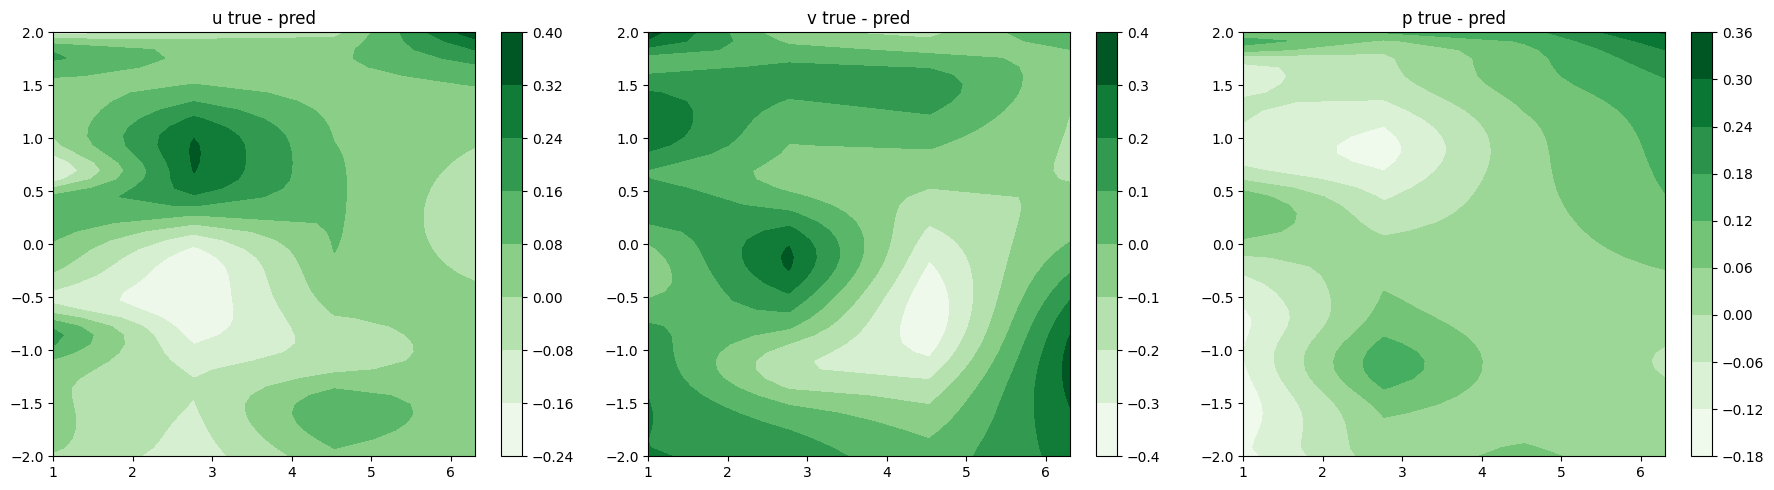

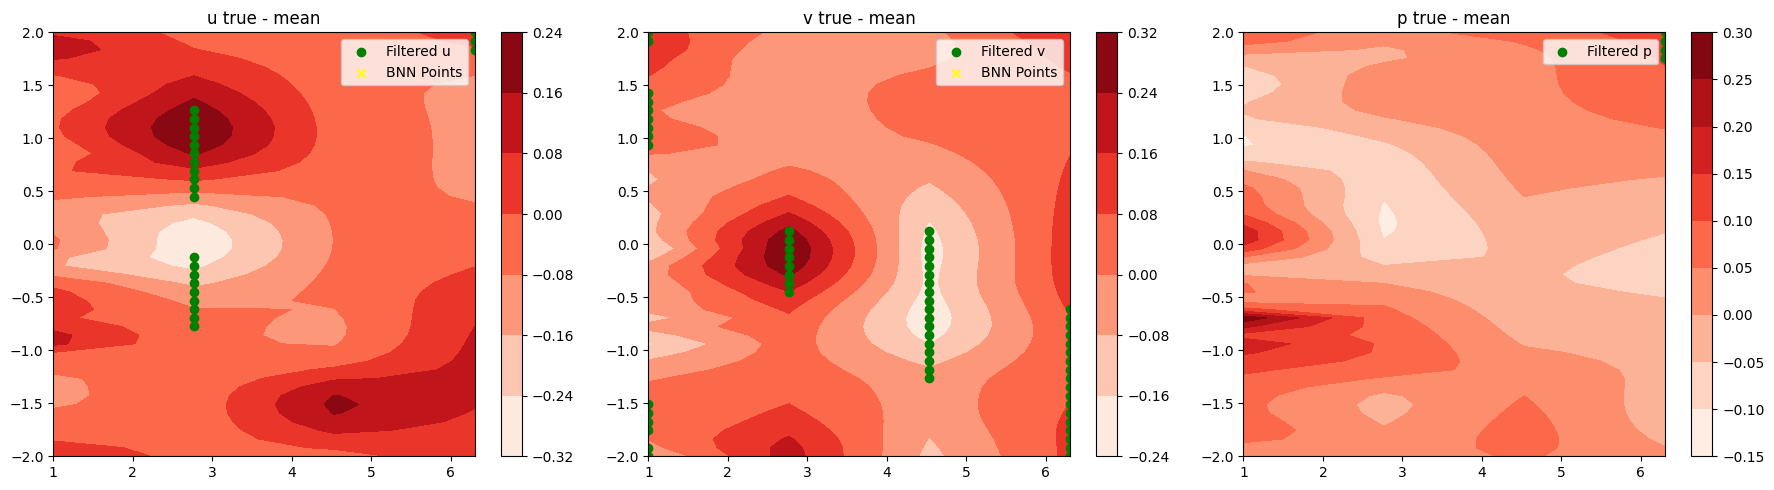

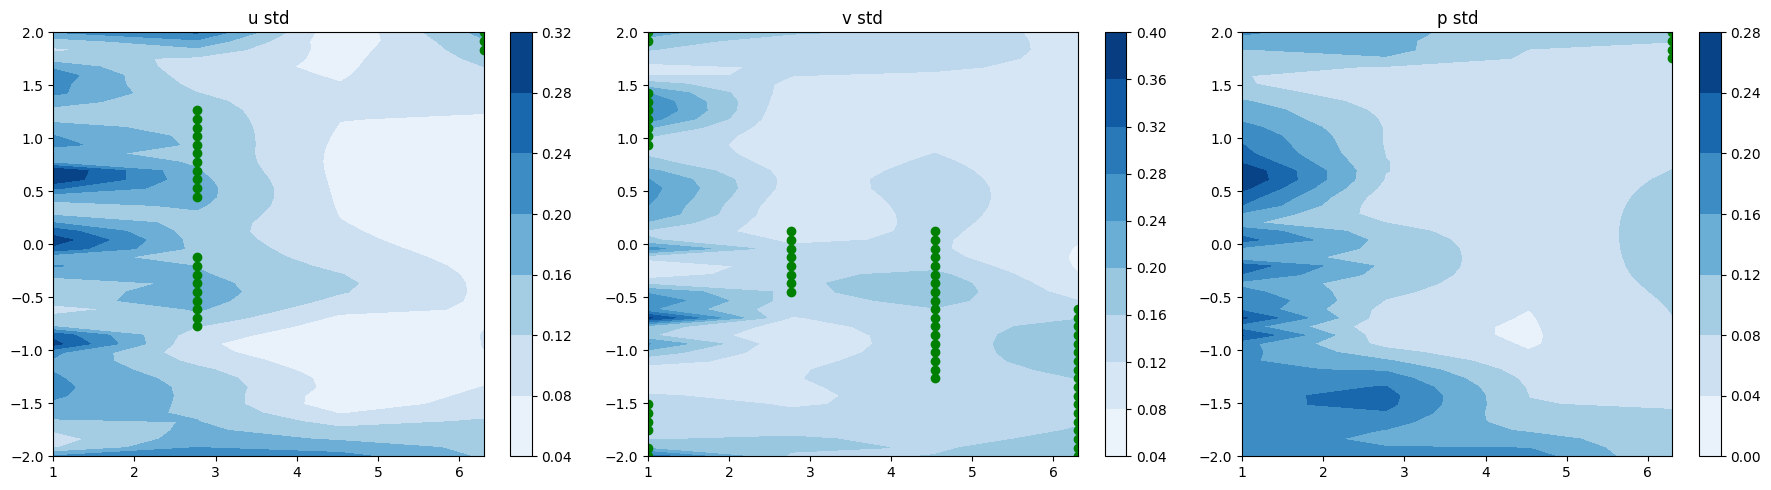

In [ ]:
# PLot a 3D surface plot for u, v and p, x and y versus mean of Y_preds for each u v and p
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for X and Y
X_unique = np.unique(X_tf[:,0])
Y_unique = np.unique(X_tf[:,1])
X, Y = np.meshgrid(X_unique, Y_unique)

Zu = Y_tf[:,0]-Y_mean[:,0]
Zv = Y_tf[:,1]-Y_mean[:,1]
Zp = Y_tf[:,2]-Y_mean[:,2]
# Reshape Y_mean to match the shape of the meshgrid
Z_u = Zu.reshape(X.shape)
Z_v = Zv.reshape(X.shape)
Z_p = Zp.reshape(X.shape)

Y_pred = model.forward(X_tf)
# Convert Y_pred to numpy array
Y_pred = Y_pred.numpy()

# From true - pred, choose values that are more than +- 0.3
Z_u_filtered = Y_tf[:,0] - Y_pred[:,0]
Z_v_filtered = Y_tf[:,1] - Y_pred[:,1]
Z_p_filtered = Y_tf[:,2] - Y_pred[:,2]
# Choose now
Z_u_filtered = np.where(np.abs(Z_u_filtered) > 0.2)
Z_v_filtered = np.where(np.abs(Z_v_filtered) > 0.2)
Z_p_filtered = np.where(np.abs(Z_p_filtered) > 0.2)
# Convert array
Z_u_filtered = np.array(Z_u_filtered)
Z_v_filtered = np.array(Z_v_filtered)
Z_p_filtered = np.array(Z_p_filtered)
# Print
print("Z_u_filtered: ", Z_u_filtered.shape)
print("Z_v_filtered: ", Z_v_filtered.shape)
print("Z_p_filtered: ", Z_p_filtered.shape)
print("Z_u_filtered: ",  ','.join(map(str, Z_u_filtered.flatten())))
print("Z_v_filtered: ",  ','.join(map(str, Z_v_filtered.flatten())))
print("Z_p_filtered: ",  ','.join(map(str, Z_p_filtered.flatten())))

# Take unique for Z filtered
Z_filtered = np.unique(np.concatenate([Z_u_filtered.flatten(), Z_v_filtered.flatten(), Z_p_filtered.flatten()]))
print("Z_filtered: ",  ','.join(map(str, Z_filtered.flatten())))

BNN_filter_u = np.array([94,104,114,124,134,144,154,161,164,171,181,183,193,197,203,207,213,217,222,223,227,232,233,237,242,243,247,252,253,254,263,264,273,274,283,284,294,304,314,324,334,341,351,361,371,381])
BNN_filter_v = np.array([66,75,76,85,94,95,104,114,131,140,150,173,183,193,199,203,209,213,219,223,229,233,239,243,248,249,253,258,259,263,268,269,273,278,279,282,283,288,289,292,293,298,299,302,308,309,312,318,319,322,328,329,339,349,359,369,378,388,398,408,418])
BNN_filter_u = []
BNN_filter_v = []

# 2D contour plot for u, v, and p with colorbar
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# u
contour_u = axs[0].contourf(X, Y, Y_tf[:,0].reshape(X.shape) - Y_pred[:,0].reshape(X.shape), cmap='Greens')
axs[0].scatter(X_tf[BNN_filter_u, 0], X_tf[BNN_filter_u, 1], color='yellow', marker='x',label='BNN Points')
fig.colorbar(contour_u, ax=axs[0])
axs[0].set_title('u true - pred')

# v
contour_v = axs[1].contourf(X, Y, Y_tf[:,1].reshape(X.shape) - Y_pred[:,1].reshape(X.shape), cmap='Greens')
axs[1].scatter(X_tf[BNN_filter_v, 0], X_tf[BNN_filter_v, 1], color='yellow', marker='x',label='BNN Points')
fig.colorbar(contour_v, ax=axs[1])
axs[1].set_title('v true - pred')

# p
contour_p = axs[2].contourf(X, Y, Y_tf[:,2].reshape(X.shape) - Y_pred[:,2].reshape(X.shape), cmap='Greens')
fig.colorbar(contour_p, ax=axs[2])
axs[2].set_title('p true - pred')

plt.tight_layout()
plt.show()

# 2D contour plot for u, v, and p with colorbar
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# u
contour_u = axs[0].contourf(X, Y, Z_u, cmap='Reds')
fig.colorbar(contour_u, ax=axs[0])
axs[0].set_title('u true - mean')
axs[0].scatter(X_tf[Z_u_filtered, 0], X_tf[Z_u_filtered, 1], color='green', marker='o', label='Filtered u')
axs[0].scatter(X_tf[BNN_filter_u, 0], X_tf[BNN_filter_u, 1], color='yellow', marker='x',label='BNN Points')
axs[0].legend()

# v
contour_v = axs[1].contourf(X, Y, Z_v, cmap='Reds')
fig.colorbar(contour_v, ax=axs[1])
axs[1].set_title('v true - mean')
axs[1].scatter(X_tf[Z_v_filtered, 0], X_tf[Z_v_filtered, 1], color='green', marker='o', label='Filtered v')
axs[1].scatter(X_tf[BNN_filter_v, 0], X_tf[BNN_filter_v, 1], color='yellow', marker='x',label='BNN Points')
axs[1].legend()

# p
contour_p = axs[2].contourf(X, Y, Z_p, cmap='Reds')
fig.colorbar(contour_p, ax=axs[2])
axs[2].set_title('p true - mean')
axs[2].scatter(X_tf[Z_p_filtered, 0], X_tf[Z_p_filtered, 1], color='green', marker='o', label='Filtered p')
axs[2].legend()

plt.tight_layout()
plt.show()

# 2D contour plot for standard deviation of u, v, and p with colorbar
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# u
contour_u_std = axs[0].contourf(X, Y, Y_std[:,0].reshape(X.shape), cmap='Blues')
fig.colorbar(contour_u_std, ax=axs[0])
axs[0].scatter(X_tf[Z_u_filtered, 0], X_tf[Z_u_filtered, 1], color='green', marker='o', label='Filtered u')
axs[0].scatter(X_tf[BNN_filter_u, 0], X_tf[BNN_filter_u, 1], color='yellow', marker='x',label='BNN Points')
axs[0].set_title('u std')

# v
contour_v_std = axs[1].contourf(X, Y, Y_std[:,1].reshape(X.shape), cmap='Blues')
fig.colorbar(contour_v_std, ax=axs[1])
axs[1].scatter(X_tf[Z_v_filtered, 0], X_tf[Z_v_filtered, 1], color='green', marker='o', label='Filtered v')
axs[1].scatter(X_tf[BNN_filter_v, 0], X_tf[BNN_filter_v, 1], color='yellow', marker='x',label='BNN Points')
axs[1].set_title('v std')

# p
contour_p_std = axs[2].contourf(X, Y, Y_std[:,2].reshape(X.shape), cmap='Blues')
fig.colorbar(contour_p_std, ax=axs[2])
axs[2].scatter(X_tf[Z_p_filtered, 0], X_tf[Z_p_filtered, 1], color='green', marker='o', label='Filtered p')
axs[2].set_title('p std')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

x = X_unique
y = Y_unique
data_u = Y_preds_u
data_v = Y_preds_v
data_p = Y_preds_p
# Reshape data into 2D grid for each sample like samples, x and y
data_u = data_u.reshape(data_u.shape[0], len(y), len(x))
data_v = data_v.reshape(data_v.shape[0], len(y), len(x))
data_p = data_p.reshape(data_p.shape[0], len(y), len(x))
true_u = Y_tf[:,0].reshape(len(y), len(x))
true_v = Y_tf[:,1].reshape(len(y), len(x))
true_p = Y_tf[:,2].reshape(len(y), len(x))
print(data_u.shape)
print(data_v.shape)
print(data_p.shape)

# Function to plot all sample lines for a given slice
def plot_distribution(slice_index, axis='x', variable='u'):
    plt.figure(figsize=(15, 3))
    
    if variable == 'u':
        data = data_u
        true = true_u
    elif variable == 'v':
        data = data_v
        true = true_v
    elif variable == 'p':
        data = data_p
        true = true_p
    
    if axis == 'x':
        for i in range(accepted_samples):
            plt.plot(y, data[i, :, slice_index], alpha=0.7, label=f'Sample {i+1}')
        plt.fill_between(y, np.mean(data[:, :, slice_index], axis=0) - np.std(data[:, :, slice_index], axis=0), np.mean(data[:, :, slice_index], axis=0) + np.std(data[:, :, slice_index], axis=0), color='blue', alpha=0.5, label='Distribution')
        plt.plot(y, true[:, slice_index], c='r', label='True', linewidth=5, alpha=1)
        plt.xlabel("Y Coordinate")
        plt.title(f"X Slice at {x[slice_index]:.2f} for {variable}")
    elif axis == 'y':
        for i in range(accepted_samples):
            plt.plot(x, data[i, slice_index, :], alpha=0.7, label=f'Sample {i+1}')
        plt.fill_between(x, np.mean(data[:, slice_index, :], axis=0) - np.std(data[:, slice_index, :], axis=0), np.mean(data[:, slice_index, :], axis=0) + np.std(data[:, slice_index, :], axis=0), color='blue', alpha=0.5, label='Distribution')
        plt.plot(x, true[slice_index, :], c='r', label='True', linewidth=5, alpha=1)
        plt.xlabel("X Coordinate")
        plt.title(f"Y Slice at {y[slice_index]:.2f} for {variable}")
    
    plt.ylabel("Value")
    plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Interactive widgets for x and y sliders
print("Interactive Slice Viewer (20 Samples):")
interact(
    lambda slice_index: plot_distribution(slice_index, axis='x', variable='u'),
    slice_index=(0, x.shape[0] - 1, 1)  # Slicing along x-axis (50 points)
)
interact(
    lambda slice_index: plot_distribution(slice_index, axis='y', variable='u'),
    slice_index=(0, y.shape[0] - 1, 1)  # Slicing along y-axis (100 points)
)
interact(
    lambda slice_index: plot_distribution(slice_index, axis='x', variable='v'),
    slice_index=(0, x.shape[0] - 1, 1)  # Slicing along x-axis (50 points)
)
interact(
    lambda slice_index: plot_distribution(slice_index, axis='y', variable='v'),
    slice_index=(0, y.shape[0] - 1, 1)  # Slicing along y-axis (100 points)
)
interact(
    lambda slice_index: plot_distribution(slice_index, axis='x', variable='p'),
    slice_index=(0, x.shape[0] - 1, 1)  # Slicing along x-axis (50 points)
)
interact(
    lambda slice_index: plot_distribution(slice_index, axis='y', variable='p'),
    slice_index=(0, y.shape[0] - 1, 1)  # Slicing along y-axis (100 points)
)

(6, 50, 4)
(6, 50, 4)
(6, 50, 4)
Interactive Slice Viewer (20 Samples):


interactive(children=(IntSlider(value=1, description='slice_index', max=3), Output()), _dom_classes=('widget-i…

interactive(children=(IntSlider(value=24, description='slice_index', max=49), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=1, description='slice_index', max=3), Output()), _dom_classes=('widget-i…

interactive(children=(IntSlider(value=24, description='slice_index', max=49), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=1, description='slice_index', max=3), Output()), _dom_classes=('widget-i…

interactive(children=(IntSlider(value=24, description='slice_index', max=49), Output()), _dom_classes=('widget…

<function __main__.<lambda>(slice_index)>

In [ ]:
import pandas as pd

def compute_residual(model, input_data, output_data, nu, scheme):

    x = input_data[:, 0:1]
    y = input_data[:, 1:2]
    t = input_data[:, 2:3]

    dx = np.unique(x)[1] - np.unique(x)[0]
    dy = np.unique(y)[1] - np.unique(y)[0]
    PDE_step = 1
    dx = dx * PDE_step; dy = dy * PDE_step
    
    xE, xW = x + dx, x - dx
    yN, yS = y + dy, y - dy

    if shift == 1:
        xE, xW = xE + dx, xW + dx
        yN, yS = yN + dy, yS + dy
        

    u = model.forward(tf.concat([x, y, t], axis=1))[:, 0:1]
    v = model.forward(tf.concat([x, y, t], axis=1))[:, 1:2]
    p = model.forward(tf.concat([x, y, t], axis=1))[:, 2:3]
    uE, uW = model.forward(tf.concat([xE, y, t], axis=1))[:, 0:1], model.forward(tf.concat([xW, y, t], axis=1))[:, 0:1]
    vE, vW = model.forward(tf.concat([xE, y, t], axis=1))[:, 1:2], model.forward(tf.concat([xW, y, t], axis=1))[:, 1:2]
    pE, pW = model.forward(tf.concat([xE, y, t], axis=1))[:, 2:3], model.forward(tf.concat([xW, y, t], axis=1))[:, 2:3]
    uN, uS = model.forward(tf.concat([x, yN, t], axis=1))[:, 0:1], model.forward(tf.concat([x, yS, t], axis=1))[:, 0:1]
    vN, vS = model.forward(tf.concat([x, yN, t], axis=1))[:, 1:2], model.forward(tf.concat([x, yS, t], axis=1))[:, 1:2]
    pN, pS = model.forward(tf.concat([x, yN, t], axis=1))[:, 2:3], model.forward(tf.concat([x, yS, t], axis=1))[:, 2:3]

    uEE = model.forward(tf.concat([x + 2 * dx, y, t], axis=1))[:, 0:1]
    uWW = model.forward(tf.concat([x - 2 * dx, y, t], axis=1))[:, 0:1]
    uNN = model.forward(tf.concat([x, y + 2 * dy, t], axis=1))[:, 0:1]
    uSS = model.forward(tf.concat([x, y - 2 * dy, t], axis=1))[:, 0:1]
    vEE = model.forward(tf.concat([x + 2 * dx, y, t], axis=1))[:, 1:2]
    vWW = model.forward(tf.concat([x - 2 * dx, y, t], axis=1))[:, 1:2]
    vNN = model.forward(tf.concat([x, y + 2 * dy, t], axis=1))[:, 1:2]
    vSS = model.forward(tf.concat([x, y - 2 * dy, t], axis=1))[:, 1:2]
    pWW = model.forward(tf.concat([x - 2 * dx, y, t], axis=1))[:, 2:3]
    pNN = model.forward(tf.concat([x, y + 2 * dy, t], axis=1))[:, 2:3]
    pSS = model.forward(tf.concat([x, y - 2 * dy, t], axis=1))[:, 2:3]

    '''u, v, p = np.take(u, index_y, axis=0), np.take(v, index_y, axis=0), np.take(p, index_y, axis=0)
    uE, uW, uS, uN = np.take(uE, index_y, axis=0), np.take(uW, index_y, axis=0), np.take(uS, index_y, axis=0), np.take(uN, index_y, axis=0)
    vE, vW, vS, vN = np.take(vE, index_y, axis=0), np.take(vW, index_y, axis=0), np.take(vS, index_y, axis=0), np.take(vN, index_y, axis=0)
    pE, pW, pS, pN = np.take(pE, index_y, axis=0), np.take(pW, index_y, axis=0), np.take(pS, index_y, axis=0), np.take(pN, index_y, axis=0)
    uEE, uWW, uSS, uNN = np.take(uEE, index_y, axis=0), np.take(uWW, index_y, axis=0), np.take(uSS, index_y, axis=0), np.take(uNN, index_y, axis=0)
    vEE, vWW, vSS, vNN = np.take(vEE, index_y, axis=0), np.take(vWW, index_y, axis=0), np.take(vSS, index_y, axis=0), np.take(vNN, index_y, axis=0)
    pWW, pSS, pNN = np.take(pWW, index_y, axis=0), np.take(pSS, index_y, axis=0), np.take(pNN, index_y, axis=0)'''


    if scheme == '2ndSimple':

        u_x = (3 * u - 4 * uW + uWW) / (2 * dx)
        u_y = (3 * u - 4 * uS + uSS) / (2 * dy) 
        v_x = (3 * v - 4 * vW + vWW) / (2 * dx)
        v_y = (3 * v - 4 * vS + vSS) / (2 * dy)
        p_x = (pE - pW) / (dx)
        p_y = (pN - pS) / (dy)
        u_xx = (-uEE + 4 * uE - 5 * u + 2 * uW) / dx**2
        u_yy = (-uNN + 4 * uN - 5 * u + 2 * uS) / (dy**2)
        v_xx = (-vEE + 4 * vE - 5 * v + 2 * vW) / dx**2
        v_yy = (-vNN + 4 * vN - 5 * v + 2 * vS) / (dy**2)

        f_u = u*u_x + v*u_y + p_x - (1/100)*(u_xx + u_yy)  # x-momentum
        f_v = u*v_x + v*v_y + p_y - (1/100)*(v_xx + v_yy)  # y-momentum
        f_p = u_x + v_y  

        residual_df = pd.DataFrame({'f_u': f_u.numpy().flatten(), 'f_v': f_v.numpy().flatten(), 'f_p': f_p.numpy().flatten()})

    elif scheme == '2ndAverage':

        uc_e, uc_w = 0.5*(uE + u), 0.5*(uW + u) 
        vc_n, vc_s = 0.5*(vN + v), 0.5*(vS + v)
        div = (uc_e - uc_w) /dx + (vc_n - vc_s) /dy
        
        # 2nd upwind
        Uem_uw2 = 1.5*u  - 0.5*uW
        Uep_uw2 = 1.5*uE - 0.5*uEE  
        Uwm_uw2 = 1.5*uW - 0.5*uWW
        Uwp_uw2 = 1.5*u  - 0.5*uE
        Ue_uw2 = tf.where(tf.greater_equal(uc_e, 0.0), Uem_uw2, Uep_uw2)
        Uw_uw2 = tf.where(tf.greater_equal(uc_w, 0.0), Uwm_uw2, Uwp_uw2)
            
        Unm_uw2 = 1.5*u  - 0.5*uS
        Unp_uw2 = 1.5*uN - 0.5*uNN    
        Usm_uw2 = 1.5*uS - 0.5*uSS
        Usp_uw2 = 1.5*u  - 0.5*uN
        Un_uw2 = tf.where(tf.greater_equal(vc_n, 0.0), Unm_uw2, Unp_uw2)
        Us_uw2 = tf.where(tf.greater_equal(vc_s, 0.0), Usm_uw2, Usp_uw2)

        Vem_uw2 = 1.5*v  - 0.5*vW
        Vep_uw2 = 1.5*vE - 0.5*vEE
        Vwm_uw2 = 1.5*vW - 0.5*vWW
        Vwp_uw2 = 1.5*v  - 0.5*vE
        Ve_uw2 = tf.where(tf.greater_equal(uc_e, 0.0), Vem_uw2, Vep_uw2)
        Vw_uw2 = tf.where(tf.greater_equal(uc_w, 0.0), Vwm_uw2, Vwp_uw2)
            
        Vnm_uw2 = 1.5*v  - 0.5*vS
        Vnp_uw2 = 1.5*vN - 0.5*vNN    
        Vsm_uw2 = 1.5*vS - 0.5*vSS
        Vsp_uw2 = 1.5*v  - 0.5*vN
        Vn_uw2 = tf.where(tf.greater_equal(vc_n, 0.0), Vnm_uw2, Vnp_uw2)
        Vs_uw2 = tf.where(tf.greater_equal(vc_s, 0.0), Vsm_uw2, Vsp_uw2)
            
        UUx_uw2 = (uc_e*Ue_uw2 - uc_w*Uw_uw2) /dx
        VUy_uw2 = (vc_n*Un_uw2 - vc_s*Us_uw2) /dy
        UVx_uw2 = (uc_e*Ve_uw2 - uc_w*Vw_uw2) /dx
        VVy_uw2 = (vc_n*Vn_uw2 - vc_s*Vs_uw2) /dy
        
        # 2nd central difference    
        Uxx_cd2 = (uE - 2.0*u + uW)/ (dx*dx) 
        Uyy_cd2 = (uN - 2.0*u + uS)/ (dy*dy) 
        Vxx_cd2 = (vE - 2.0*v + vW)/ (dx*dx) 
        Vyy_cd2 = (vN - 2.0*v + vS)/ (dy*dy) 

        pe_cd2 = (p + pE) /2.0 
        pw_cd2 = (pW + p) /2.0 
        pn_cd2 = (p + pN) /2.0 
        ps_cd2 = (pS + p) /2.0 
        
        Px_cd2 = (pe_cd2 - pw_cd2) /dx
        Py_cd2 = (pn_cd2 - ps_cd2) /dy

        f_p = div
        f_u = UUx_uw2 + VUy_uw2 - 1.0/500 *(Uxx_cd2 + Uyy_cd2) - u*div + Px_cd2
        f_v = UVx_uw2 + VVy_uw2 - 1.0/500 *(Vxx_cd2 + Vyy_cd2) - v*div + Py_cd2

        residual_df = pd.DataFrame({'f_u': f_u.numpy().flatten(), 'f_v': f_v.numpy().flatten(), 'f_p': f_p.numpy().flatten()})

    elif scheme == '3rd':

        uc_e, uc_w = 0.5*(uE + u), 0.5*(uW + u) 
        vc_n, vc_s = 0.5*(vN + v), 0.5*(vS + v)
        div = (uc_e - uc_w) /dx + (vc_n - vc_s) /dy
        
        # 3rd upwind
        # Cell-centered velocity interpolation
        uc_e, uc_w = 0.5*(uE + u) , 0.5*(uW + u) 
        vc_n, vc_s = 0.5*(vN + v) , 0.5*(vS + v)
        
        # Divergence calculation
        div = (uc_e - uc_w) /dx + (vc_n - vc_s) /dy
        
        # QUICK scheme for convection terms
        Ue_quick = (3.0*uE + 6.0*u - uW) / 8.0  # East face
        Uw_quick = (3.0*u + 6.0*uW - uWW) / 8.0  # West face
        Un_quick = (3.0*uN + 6.0*u - uS) / 8.0  # North face
        Us_quick = (3.0*u + 6.0*uS - uSS) / 8.0  # South face
        
        Ve_quick = (3.0*vE + 6.0*v - vW) / 8.0  # East face
        Vw_quick = (3.0*v + 6.0*vW - vWW) / 8.0  # West face
        Vn_quick = (3.0*vN + 6.0*v - vS) / 8.0  # North face
        Vs_quick = (3.0*v + 6.0*vS - vSS) / 8.0  # South face
        
        # Convective fluxes using QUICK
        UUx_quick = (uc_e * Ue_quick - uc_w * Uw_quick) / dx
        VUy_quick = (vc_n * Un_quick - vc_s * Us_quick) / dy
        UVx_quick = (uc_e * Ve_quick - uc_w * Vw_quick) / dx
        VVy_quick = (vc_n * Vn_quick - vc_s * Vs_quick) / dy
        
        # Central difference for diffusion terms
        Uxx_cd2 = (uE - 2.0*u + uW) / (dx*dx)
        Uyy_cd2 = (uN - 2.0*u + uS) / (dy*dy)
        Vxx_cd2 = (vE - 2.0*v + vW) / (dx*dx)
        Vyy_cd2 = (vN - 2.0*v + vS) / (dy*dy)
        
        # Pressure gradient using central difference
        Px_cd2 = (pE - pW) / dx
        Py_cd2 = (pN - pS) / dy

        f_p = div
        f_u = UUx_quick + VUy_quick - 1.0/500 *(Uxx_cd2 + Uyy_cd2) - u*div + Px_cd2
        f_v = UVx_quick + VVy_quick - 1.0/500 *(Vxx_cd2 + Vyy_cd2) - v*div + Py_cd2 

        residual_df = pd.DataFrame({'f_u': f_u.numpy().flatten(), 'f_v': f_v.numpy().flatten(), 'f_p': f_p.numpy().flatten()})

    elif scheme == 'weno':
        
        uc_e, uc_w = 0.5*(uE + u), 0.5*(uW + u) 
        vc_n, vc_s = 0.5*(vN + v), 0.5*(vS + v)
        div = (uc_e - uc_w) /dx + (vc_n - vc_s) /dy

        # WENO
        # Cell-centered velocities
        uc_e, uc_w = 0.5 * (uE + u), 0.5 * (uW + u)
        vc_n, vc_s = 0.5 * (vN + v), 0.5 * (vS + v)
        
        # Divergence
        div = (uc_e - uc_w) / dx + (vc_n - vc_s) / dy
        
        # WENO Coefficients
        ϵ = 1e-6  # Small parameter to avoid division by zero
        
        def weno5(fm2, fm1, f, fp1, fp2):
            β1 = 13/12 * (fm2 - 2*fm1 + f)**2 + 1/4 * (fm2 - 4*fm1 + 3*f)**2
            β2 = 13/12 * (fm1 - 2*f + fp1)**2 + 1/4 * (fm1 - fp1)**2
            β3 = 13/12 * (f - 2*fp1 + fp2)**2 + 1/4 * (3*f - 4*fp1 + fp2)**2
        
            α1 = 1 / (ϵ + β1)**2
            α2 = 6 / (ϵ + β2)**2
            α3 = 3 / (ϵ + β3)**2
        
            ω1 = α1 / (α1 + α2 + α3)
            ω2 = α2 / (α1 + α2 + α3)
            ω3 = α3 / (α1 + α2 + α3)
        
            return ω1 * (1/3 * fm2 - 7/6 * fm1 + 11/6 * f) + \
                ω2 * (-1/6 * fm1 + 5/6 * f + 1/3 * fp1) + \
                ω3 * (1/3 * f + 5/6 * fp1 - 1/6 * fp2)
        
        # Compute WENO interpolated values
        Ue_weno = weno5(uWW, uW, u, uE, uEE)
        Uw_weno = weno5(uWW, uW, u, uE, uEE)
        Un_weno = weno5(uSS, uS, u, uN, uNN)
        Us_weno = weno5(uSS, uS, u, uN, uNN)
        
        Ve_weno = weno5(vWW, vW, v, vE, vEE)
        Vw_weno = weno5(vWW, vW, v, vE, vEE)
        Vn_weno = weno5(vSS, vS, v, vN, vNN)
        Vs_weno = weno5(vSS, vS, v, vN, vNN)
        
        # Compute convective fluxes
        UUx_weno = (uc_e * Ue_weno - uc_w * Uw_weno) / dx
        VUy_weno = (vc_n * Un_weno - vc_s * Us_weno) / dy
        UVx_weno = (uc_e * Ve_weno - uc_w * Vw_weno) / dx
        VVy_weno = (vc_n * Vn_weno - vc_s * Vs_weno) / dy
        
        # Central difference for diffusion terms
        Uxx_cd2 = (uE - 2.0 * u + uW) / (dx * dx)
        Uyy_cd2 = (uN - 2.0 * u + uS) / (dy * dy)
        Vxx_cd2 = (vE - 2.0 * v + vW) / (dx * dx)
        Vyy_cd2 = (vN - 2.0 * v + vS) / (dy * dy)
        
        # Pressure gradient using central difference
        Px_cd2 = (pE - pW) / dx
        Py_cd2 = (pN - pS) / dy

        f_p = div
        f_u = UUx_weno + VUy_weno - 1.0/500 *(Uxx_cd2 + Uyy_cd2) - u*div + Px_cd2
        f_v = UVx_weno + VVy_weno - 1.0/500 *(Vxx_cd2 + Vyy_cd2) - v*div + Py_cd2

        residual_df = pd.DataFrame({'f_u': f_u.numpy().flatten(), 'f_v': f_v.numpy().flatten(), 'f_p': f_p.numpy().flatten()})

    #residual_others = pd.DataFrame({'u': u.numpy().flatten(), 'v': v.numpy().flatten(), 'p': p.numpy().flatten(), 'u_x': u_x.numpy().flatten(), 'u_y': u_y.numpy().flatten(), 'v_x': v_x.numpy().flatten(), 'v_y': v_y.numpy().flatten(), 'p_x': p_x.numpy().flatten(), 'p_y': p_y.numpy().flatten(), 'u_xx': u_xx.numpy().flatten(), 'u_yy': u_yy.numpy().flatten(), 'v_xx': v_xx.numpy().flatten(), 'v_yy': v_yy.numpy().flatten()})
    #residual_df = pd.DataFrame({'f_u': f_u.numpy().flatten(), 'f_v': f_v.numpy().flatten(), 'f_p': f_p.numpy().flatten()})
    
    return residual_df#, residual_others

#residual_df, residual_others = compute_residual(model, x, y, nu, scheme)
scheme = '2ndAverage'
input_data = X_tf
output_data = Y_tf
residual_df = compute_residual(model, input_data, output_data, nu, scheme)

In [ ]:
# Use the distributed prediction to compute the residual, using the function compute all residuals
residuals_list_u = []; residuals_list_v = []; residuals_list_p = []
residuals_other_list = []
for sample in samples:
    num_weights = len(sample) // 2
    model.weights = sample[:num_weights]
    model.biases = sample[num_weights:]
    #residual_df, residual_others = compute_residual(model, x, y, nu)
    residual_df = compute_residual(model, input_data, output_data, nu, scheme)    
    residuals_list_u.append(residual_df['f_u']); residuals_list_v.append(residual_df['f_v']); residuals_list_p.append(residual_df['f_p'])
    #residuals_other_list.append(residual_others)

# Calculate mean and std for residuals_list_u, residuals_list_v, residuals_list_p
residuals_list_u = np.array(residuals_list_u)
residuals_list_v = np.array(residuals_list_v)
residuals_list_p = np.array(residuals_list_p)
residuals_mean_u = np.mean(residuals_list_u, axis=0); residuals_mean_v = np.mean(residuals_list_v, axis=0); residuals_mean_p = np.mean(residuals_list_p, axis=0)
residuals_std_u = np.std(residuals_list_u, axis=0); esiduals_std_v = np.std(residuals_list_v, axis=0); residuals_std_p = np.std(residuals_list_p, axis=0)

# How many accepted samples
num_accepted_samples = residuals_list_u.shape[0]
print("Number of accepted samples: ", num_accepted_samples)

Number of accepted samples:  6


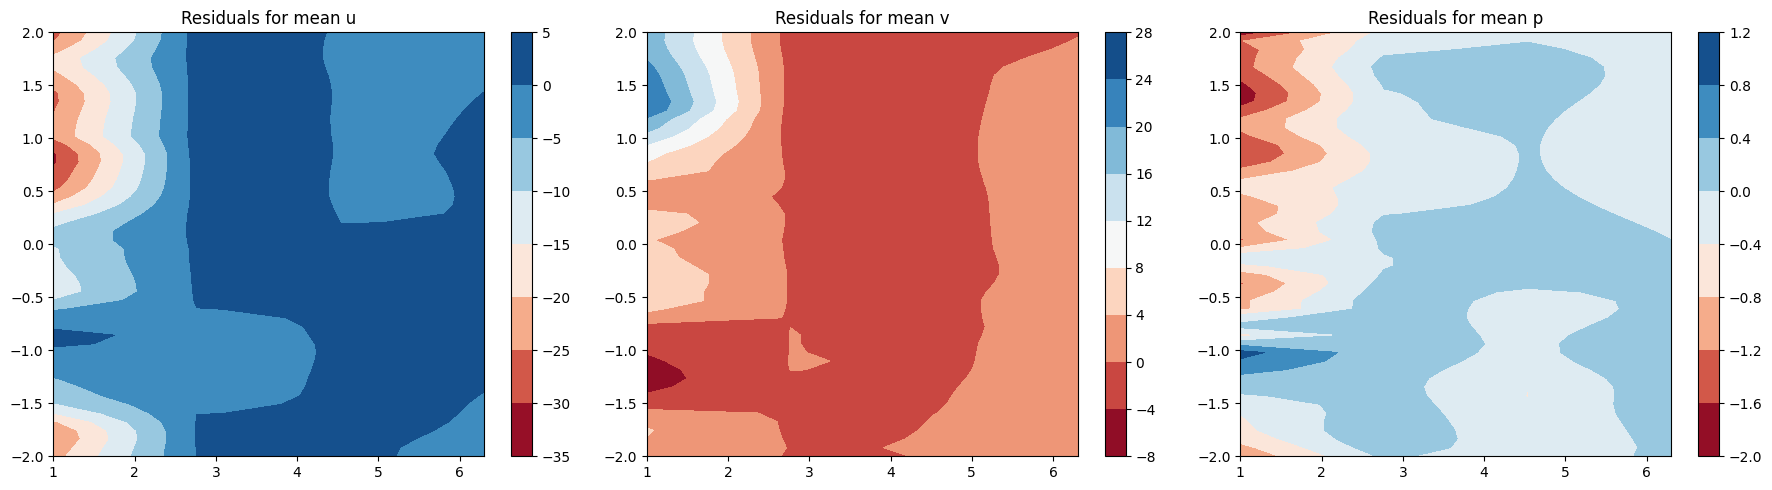

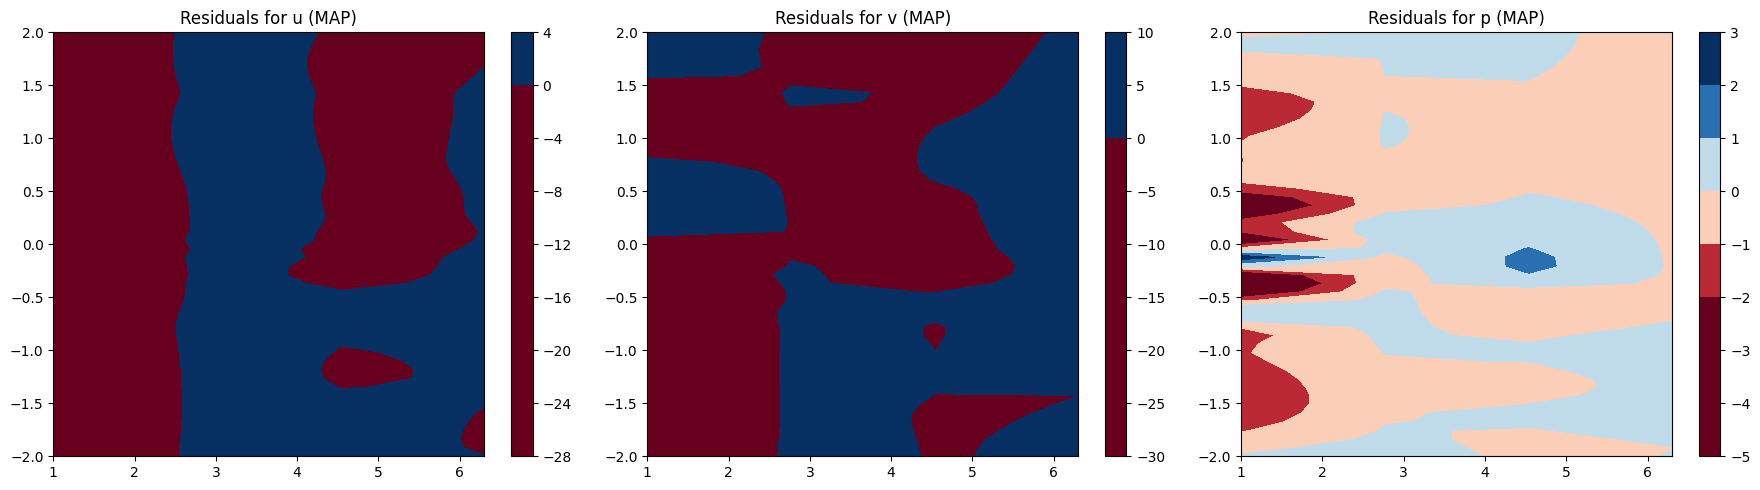

In [ ]:
# Plot distribution of residuals for u, v and p in 2D contour plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# u
contour_residual_u = axs[0].contourf(X, Y, residuals_mean_u.reshape(X.shape), cmap='RdBu')
fig.colorbar(contour_residual_u, ax=axs[0])
axs[0].set_title('Residuals for mean u')

# v
contour_residual_v = axs[1].contourf(X, Y, residuals_mean_v.reshape(X.shape), cmap='RdBu')
fig.colorbar(contour_residual_v, ax=axs[1])
axs[1].set_title('Residuals for mean v')

# p
contour_residual_p = axs[2].contourf(X, Y, residuals_mean_p.reshape(X.shape), cmap='RdBu')
fig.colorbar(contour_residual_p, ax=axs[2])
axs[2].set_title('Residuals for mean p')

plt.tight_layout()
plt.show()

# Plot distribution of residuals for u, v and p in 2D contour plot for MAP
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# u
contour_residual_u = axs[0].contourf(X, Y, residuals_list_u[0].reshape(X.shape), cmap='RdBu', vmin=-2, vmax=2)
fig.colorbar(contour_residual_u, ax=axs[0])
axs[0].set_title('Residuals for u (MAP)')

# v
contour_residual_v = axs[1].contourf(X, Y, residuals_list_v[0].reshape(X.shape), cmap='RdBu', vmin=-2, vmax=2)
fig.colorbar(contour_residual_v, ax=axs[1])
axs[1].set_title('Residuals for v (MAP)')

# p
contour_residual_p = axs[2].contourf(X, Y, residuals_list_p[0].reshape(X.shape), cmap='RdBu', vmin=-2, vmax=2)
fig.colorbar(contour_residual_p, ax=axs[2])
axs[2].set_title('Residuals for p (MAP)')

plt.tight_layout()
plt.show()

Mean CRPS for Bayesian neural network: 0.090110150130916
Standard deviation CRPS for Bayesian neural network: 0.07613939234410635


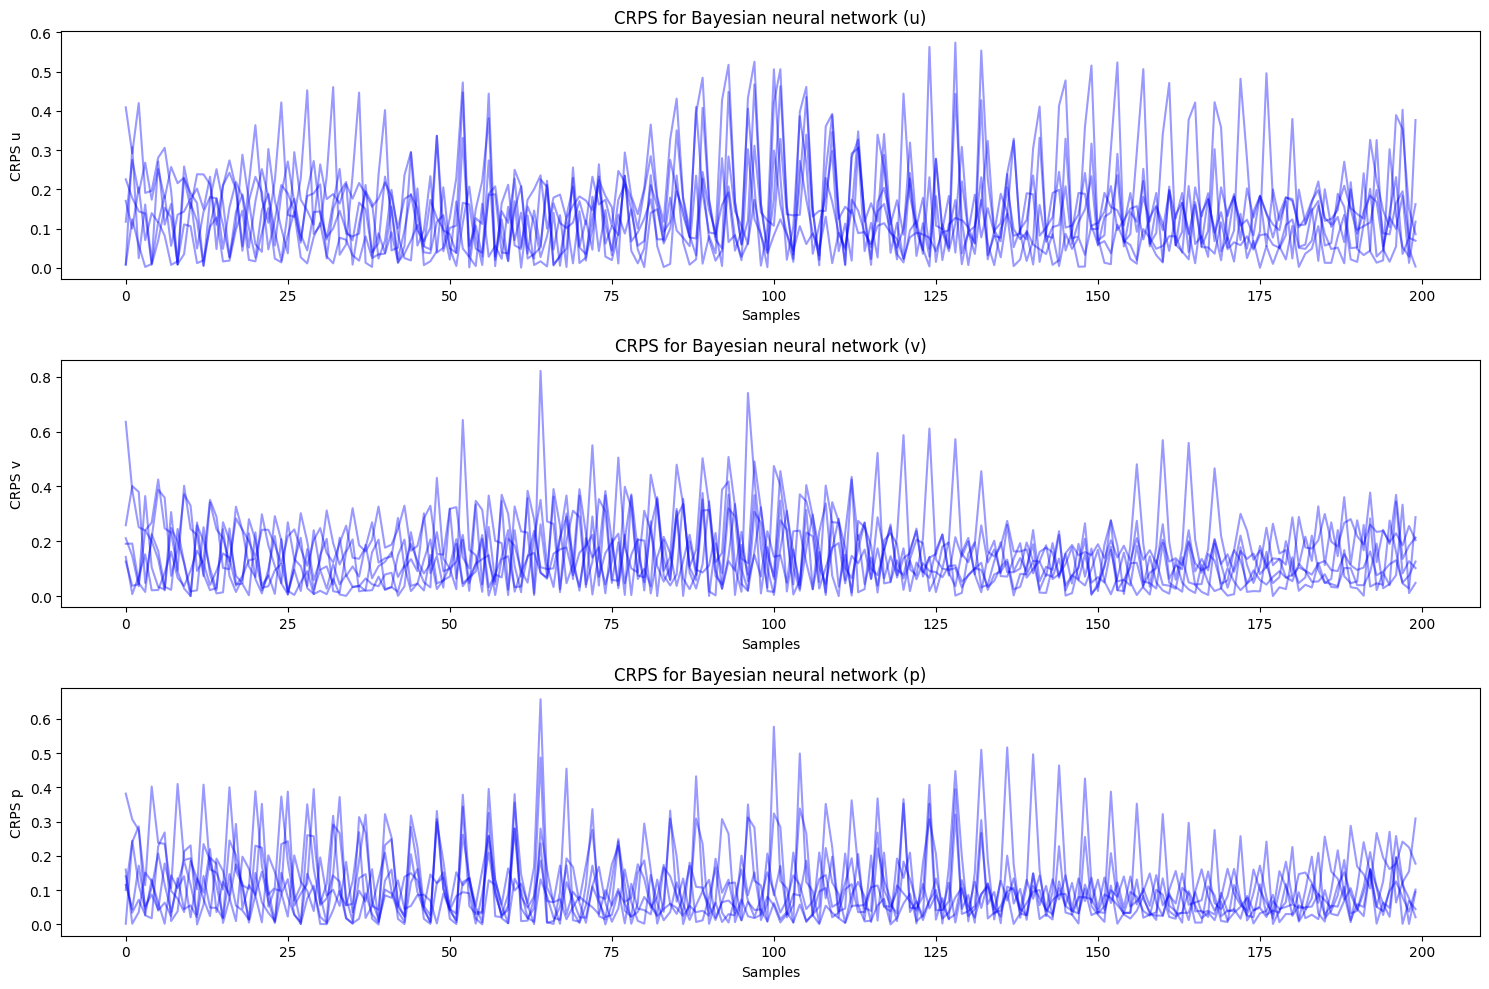

In [ ]:
# Use CRPS to evaluate the probabilistic output
def crps(y, mean, std):
    # Compute the CRPS
    y = (y - mean) / std
    crps = std * (y * (2 * norm.cdf(y) - 1) + 2 * norm.pdf(y) - 1 / np.sqrt(np.pi)) # cdf is the cumulative distribution function of the standard normal distribution
    return crps

from scipy.stats import norm

Y_crps = crps(Y_tf, Y_mean, Y_std)
#print("CRPS for Bayesian neural network:", Y_crps)

# Compute the CRPS for the samples
Y_crps_samples = []
for i in range(Y_preds_sampled.shape[0]):
    Y_crps_sample = crps(Y_tf, Y_preds_sampled[i], Y_std)
    Y_crps_samples.append(Y_crps_sample)

Y_crps_samples = np.array(Y_crps_samples)
Y_crps_mean = np.mean(Y_crps_samples)
Y_crps_std = np.std(Y_crps_samples)
print("Mean CRPS for Bayesian neural network:", Y_crps_mean)
print("Standard deviation CRPS for Bayesian neural network:", Y_crps_std)
'''
# Plot the CRPS for the samples
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
for i in range(Y_preds_sampled.shape[0]):
    plt.plot(range(500), Y_crps_samples[i, :, 0], color='blue', alpha=0.4)
plt.xlabel('Samples')
plt.ylabel('CRPS u')
plt.title('CRPS for Bayesian neural network (u)')

plt.subplot(3, 1, 2)
for i in range(Y_preds_sampled.shape[0]):
    plt.plot(range(500), Y_crps_samples[i, :, 1], color='blue', alpha=0.4)
plt.xlabel('Samples')
plt.ylabel('CRPS v')
plt.title('CRPS for Bayesian neural network (v)')

plt.subplot(3, 1, 3)
for i in range(Y_preds_sampled.shape[0]):
    plt.plot(range(500), Y_crps_samples[i, :, 2], color='blue', alpha=0.4)
plt.xlabel('Samples')
plt.ylabel('CRPS p')
plt.title('CRPS for Bayesian neural network (p)')

plt.tight_layout()
plt.show()
'''
from properscoring import crps_ensemble 

# Compute the CRPS using the properscoring package
Y_crps_ensemble = [crps_ensemble(Y_tf, Y_preds_sampled) for Y_preds_sampled in Y_preds_sampled]
#print("CRPS for Bayesian neural network using properscoring package:", Y_crps_ensemble)

# Plot the CRPS for the samples
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
for i in range(len(Y_crps_ensemble)):
    plt.plot(range(XX.shape[0]), Y_crps_ensemble[i][:, 0], color='blue', alpha=0.4)
plt.xlabel('Samples')
plt.ylabel('CRPS u')
plt.title('CRPS for Bayesian neural network (u)')

plt.subplot(3, 1, 2)
for i in range(len(Y_crps_ensemble)):
    plt.plot(range(XX.shape[0]), Y_crps_ensemble[i][:, 1], color='blue', alpha=0.4)
plt.xlabel('Samples')
plt.ylabel('CRPS v')
plt.title('CRPS for Bayesian neural network (v)')

plt.subplot(3, 1, 3)
for i in range(len(Y_crps_ensemble)):
    plt.plot(range(XX.shape[0]), Y_crps_ensemble[i][:, 2], color='blue', alpha=0.4)
plt.xlabel('Samples')
plt.ylabel('CRPS p')
plt.title('CRPS for Bayesian neural network (p)')

plt.tight_layout()
plt.show()